In [1]:
import numpy as np
import matplotlib.pyplot as plt

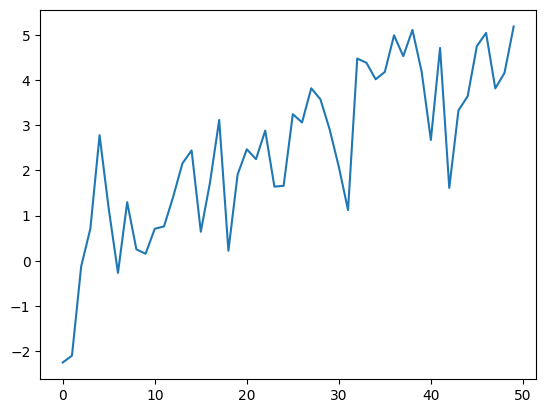

In [131]:
# generate synthetic data
data = np.zeros(shape=(50,)) + 2

delta = .1
noise_mean = 0
noise_std = 1

for i in range(len(data)):        
    data[i] = np.random.normal(loc=noise_mean, scale=noise_std) + (delta * i)

plt.plot(data)

In [132]:
def ewma(x: np.ndarray, beta: float = .8) -> np.ndarray:
    """Compute exponentially-weighted moving average over a 1-D vector x with smoothing factor beta

    Args:
        x (np.ndarray): input vector over which to computer a moving average
        beta (float, optional): smoothing factor. Must be in the range (0, 1) exclusive. Higher values result in reduced forgetting
        of previous data, while lower values allow for quicker adaptation to new dats. Defaults to .8.

    Raises:
        ValueError: if beta is not a float in the range (0, 1) exclusive
        ValueError: if x is not a 1-D numpy array

    Returns:
        np.ndarray: 1-D numpy array of the same size as x representing the exponentially-weighted moving average 
    """
    if not isinstance(beta, float) or beta <= 0 or beta >= 1:
        raise ValueError(f'beta must be a float in the range (0, 1) exclusive. Instead got {beta}')
    
    if not isinstance(x, np.ndarray) or x.ndim > 1:
        raise ValueError('x must be a 1-D numpy array')

    out = np.empty_like(x)

    for i in range(len(out)):
        if i == 0:
            out[i] = (1 - beta) * x[i]
        else:
            out[i] = (beta * x[i - 1]) + ((1 - beta) * x[i])
    
    return out

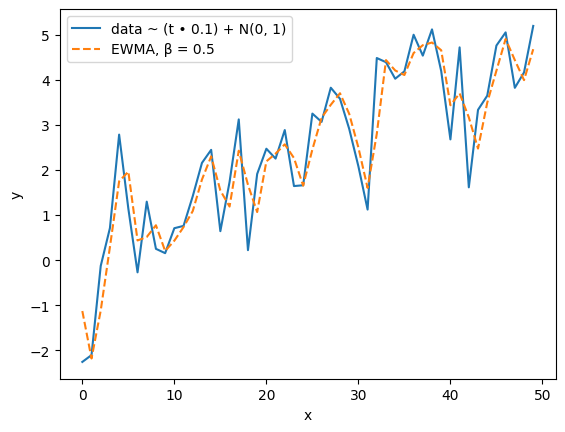

In [136]:
beta = .5

out = ewma(data, beta)

plt.plot(data, label=f'data ~ (t • {delta}) + N({noise_mean}, {noise_std})')
plt.plot(out, label=f'EWMA, β = {beta}', linestyle='--')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

- re-read the book to make sure you actually did this correctly.
- implement bias correction
- make the code for ewma in the loop less redundant